# Lab#3 - Exploring the LTE Architecture

<p style='text-align: justify;'>This lab intends to explore the LTE architecture and the attachement procedure for a user equipment (UE). The lab consists of two parts with focus on ns3 based simulations and wireshark based analysis of the connection setup and user attachement process in LTE.<br>
 The lab starts with an introduction of the LTE architecture followed by the attachement process itself encompassing different connection stages as UE initiates its connection with the LTE network. Aftrwards, the <b>Part 1</b> consists of the wireshark analysis of a pre-captured file in which basic connection establishement and user attachement procedures are analyzed. The students will perform several tasks and complete relevant exercises. Moreover, the <b>Part 2</b> consists of the design, simulation and evaluation of the connection establishement and attachement process using ns3 LTE simulation environment. In this part, students will design a custom LTE topology and observe the simulation results.

- Understand the RAN, EPC, and, interconnections between these LTE sub-networks
- Demonstration the UE attachment process
- Understanding the user and control plane in LTE

The scope of this lab covers topics from <b>Sections 4.1</b> (pp. 203),<b>4.2</b> (pp. 206-218), <b>4.6.1</b> (pp. 247)</b>, and <b>4.6.2</b> (pp. 250)</p>

## 1. Introduction

### 1.1 LTE Architecture 
The LTE network is divided into two parts: a radio network (RAN) and a core network (EPC) as shown in <a id='fig1'>[Figure. 1](#fig1)</a> . These subnetworks separate the user access and network core with different nodes for varying roles in LTE infrastructure.

| |
|---|
| 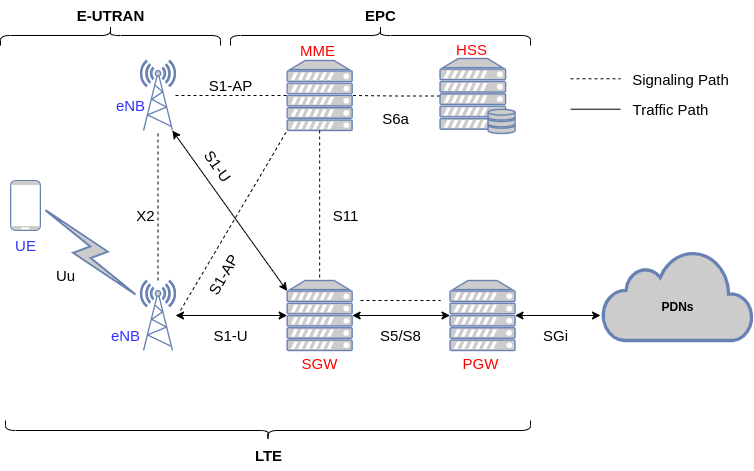 |

<a id='fig1'><p style="text-align: center;"><b>[Figure. 1: LTE Architecture](#fig1)</b></p></a>

<p style='text-align: justify;'> A visible difference in the architecture from UMTS is the introduction of the X2 interface involved in the Handover process. The S1 interface is the connection between the RAN and EPC utilized for the LTE services such as traditional calling, VOIP and dedicated data access towards the internet. In addition any signaling between RAN and EPC is also carried via S1. EPC has its own interfaces for performing different management functions related to the LTE processes like mobility and location management, user infromation management etc.<br>
</p>
    
### 1.2 LTE Protocol Stack 

LTE protocol stack as depicted in <a id='fig3'>[Figure. 2](#fig2)</a> consists of the following prominent protocols for different functionalities:


| |
|---|
| 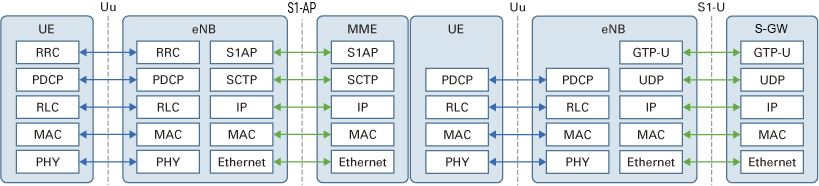 |
<a id='fig2'><p style="text-align: center;"><b>[Figure. 2: LTE Protocol Stack](#fig2)</b></a>    
    
<p style='text-align: justify;'>
- <b>Radio Resource Control (RRC)</b>: The broadcast of system information related to the non-access stratum (NAS) and broadcast of system information related to the access stratum are the key services and functions of the RRC sublayer (AS). In addition it is also responsible for paging, configuration, maintenance, and release of point-to-point radio bearers, as well as the establishment, maintenance, and release of an RRC connection between the UE and E-UTRAN.</p>
<p style='text-align: justify;'>
- <b>Packet Data Convergence Protocol (PDCP)</b>: For radio bearers mapped on RLC AM, the PDCP layer is in charge of header compression and decompression of IP data, transfer of data (user plane or control plane), maintenance of PDCP Sequence Numbers (SNs), in-sequence delivery of upper layer PDUs at re-establishment of lower layers, duplicate elimination of lower layer SDUs at re-establishment of lower layers, ciphering and deciphering of</p>
<p style='text-align: justify;'>
- <b>Radio Link Control (RLC)</b>: RLC runs in three different modes: acknowledged mode (AM), unacknowledged mode (UM), and transparent mode (TM) (AM). The transfer of upper layer PDUs, error correction via ARQ (only for AM data transfer), concatenation, segmentation, and reassembly of RLC SDUs are all handled by the RLC Layer (Only for UM and AM data transfer). Additionally, the RLC is in charge of re-ordering RLC data PDUs (only for UM and AM data transfer), re-segmenting RLC data PDUs (only for AM data transfer), detecting duplicates (only for UM and AM data transfer), discarding RLC SDUs (only for UM and AM data transfer), re-establishing the RLC, and detecting protocol errors (Only for AM data transfer).</p>

### 1.3 LTE Connection Setup

<p style='text-align: justify;'> As soon as a UE is turned on a set of procedures is adopted to ensure that the communication channel between eNB and UE is able to support the required services upon request. The connection setup is important to consider since this process initiates all the other processes in LTE including attachment and handovers. Certain information exchange must be completed during initial stages of this process. This is know as the system information (SI), which is transmitted by LTE eNB on DL channel BCCH. SI is divided into two parts: the static part and the dynamic part. </p> 

- <p style='text-align: justify;'><b>Master Information Blocks (MIB)</b>, also known as static parts, are transferred once every 40 microseconds.</p>
- <p style='text-align: justify;'><b>System Information Blocks (SIB)</b>, also known as the dynamic parts, are composed of various message kinds that are sent every 80, 160, 320, ... milliseconds.</p>

<p style='text-align: justify;'>In this lab, we will only be concerned with the MIB, SIB1, and SIB2 that carry the following information:</p>

- <p style='text-align: justify;'><b>MIB</b>: The channel bandwidth, transmit power, number of antennas, SIB scheduling, and other relevant data required for radio access.</p>
- <p style='text-align: justify;'><b>SIB1</b>: Contains information about whether or not the UE is permitted to access the LTE cell. It also determines how the other SIBs are scheduled. Cell ID, MCC, MNC, TAC, and SIB mapping are all included.</p>
- <p style='text-align: justify;'><b>SIB2</b>: Contains both common and shared channel information. RRC, uplink power control, preamble power ramping, uplink Cyclic Prefix Length, sub-frame hopping, and uplink EARFCN.</p>

<b>Note:</b> The textbook reference for these information blocks is <b>Section 4.3.8</b> (pp. 229).



### 1.4 UE eNB and RRC States

The state transitions for UE and eNB will signify the reception of these information blocks as well as the current state of these nodes. These are dictated by the following state diagrams in <a id='fig3'>[Figure. 3](#fig3)</a>. 

| |
|---|
| 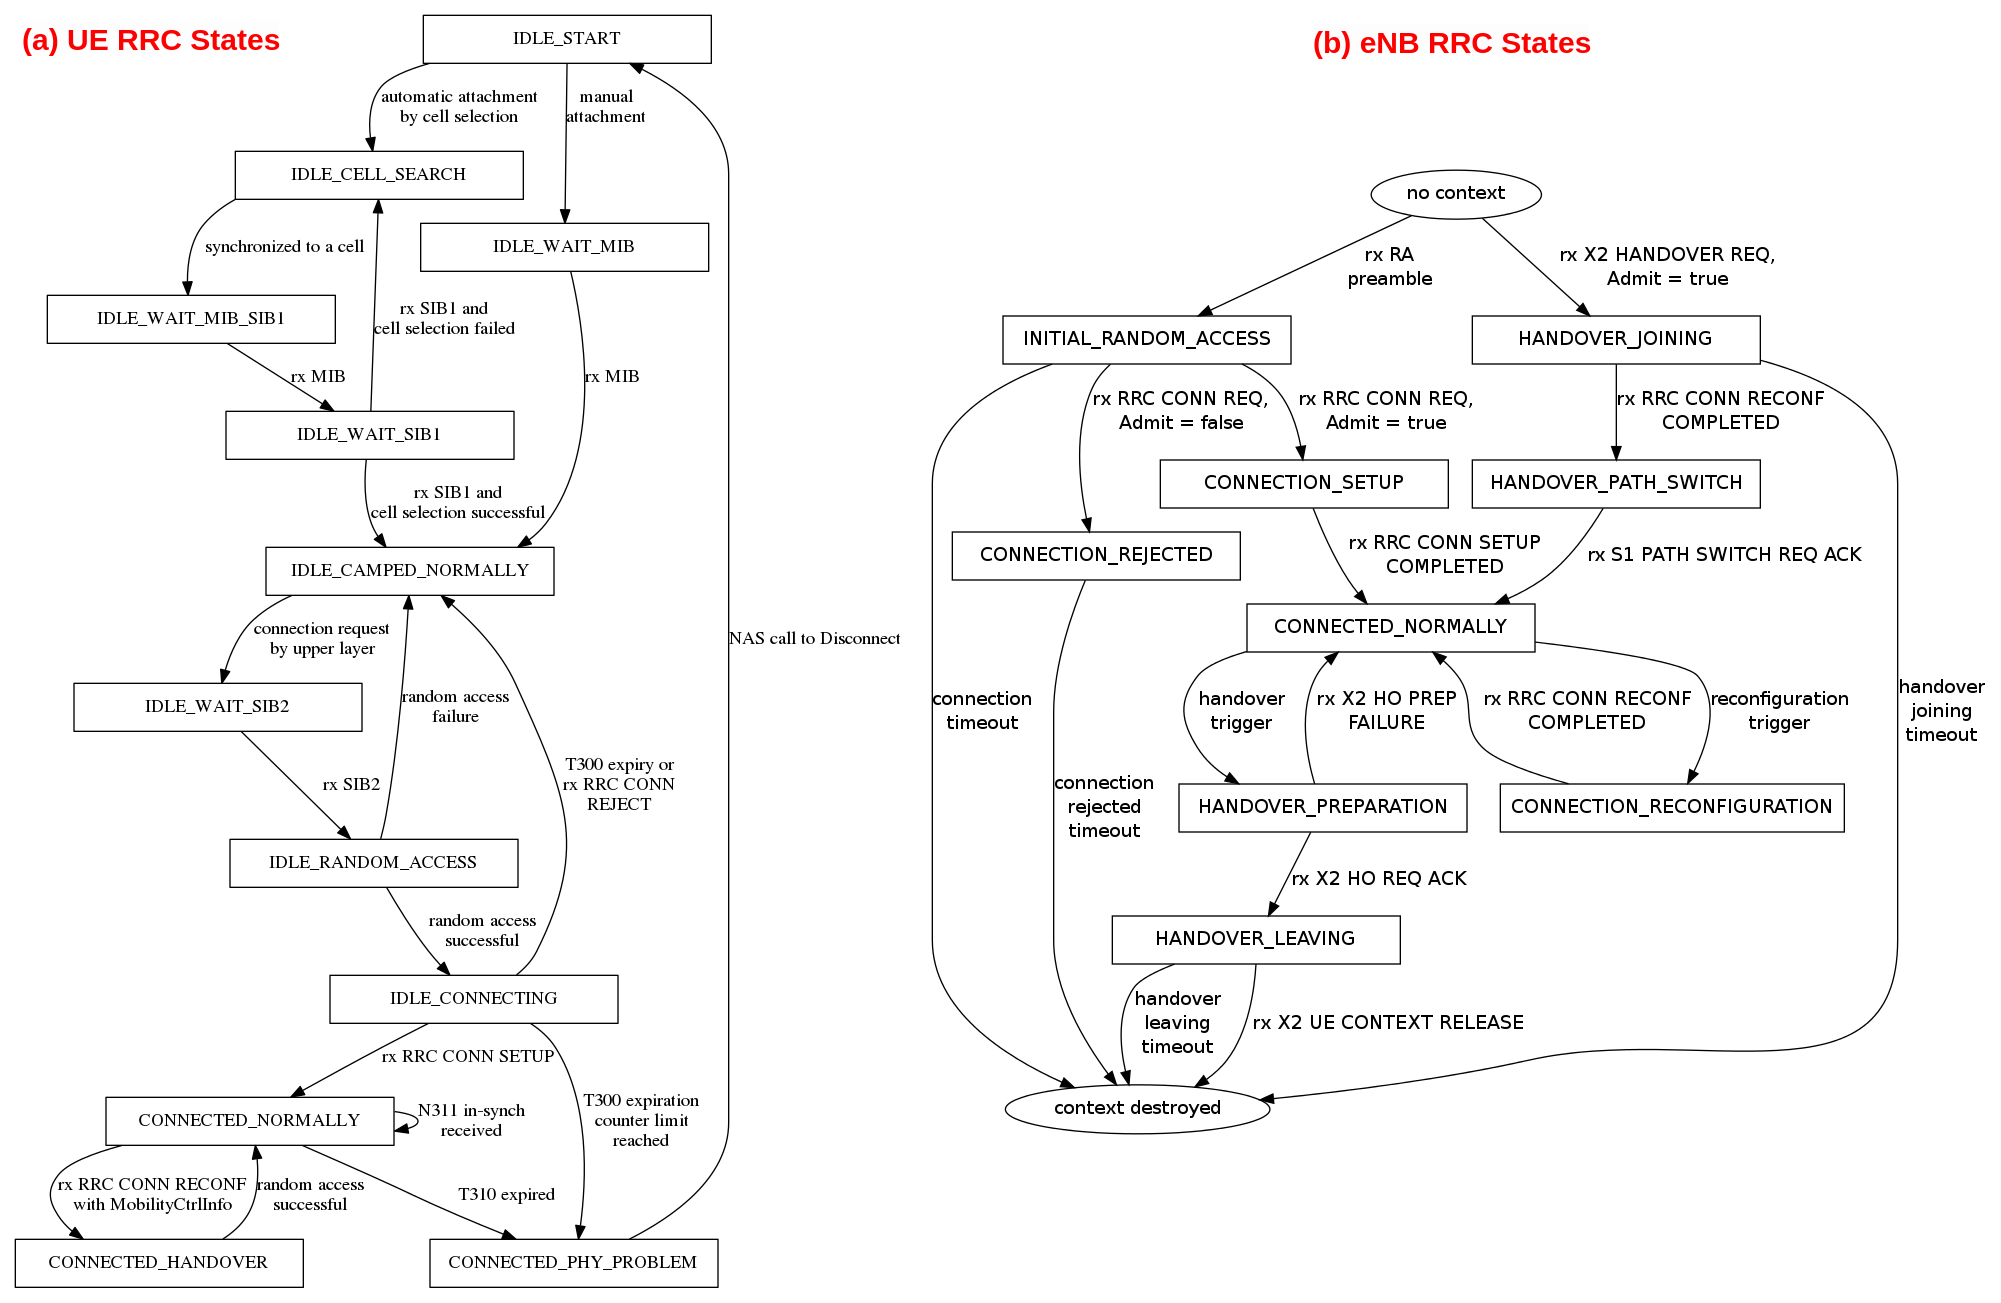 |
<a id='fig3'><p style="text-align: center;"><b>[Figure. 3: LTE RRC State Diagram, (a) UE, (b) eNB](#fig3)</b></a>   

#### 1.4.1 Connection setup procedure
The connection setup starts with the initiation of the <u>cell search</u> process initiated by a UE that has just been turned on. It searches for a suitable cell to attach by analyzing the received signal strength from different prospective cells in the area. During this process, the UE waits for the reception of MIB and SIB messages in order to collect required information about the connection. Upon reception of SIB1 and SIB2, the <u>random access</u> (RA) procedure is initiated in order to exchange more information and allow the eNB and EPC to reserve resources for upper layer communications (RRC, PDCP). The success of RA leads to the initiation of RRC connection setup with the eNB and eventual connection of eNB with EPC via S1-AP protocol. At this point, the UE is connected to the LTE network and ready to utilize the infrastructure.

This process is implemented as a finite state machine as depicted in <a id='fig3'>[Figure. 3](#fig3)</a>.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Design and Simulating an LTE Network in ns3

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <span style="color:red"> *Task#1: Radio Access Network, Enhanced Packet Core and Interactions* </span>
This task involves the creation of a basic one cell RAN topology using the React application followed by the simulation and analysis of connection setup traces using ns3. Hence, the overall learning objectives are presented as the following deliverables:

### 2.1 Designing a RAN topology
The topology design follows the same basic steps from lab0 starting from accessing the react app, design and saving of the topology . Kindly utilize the blueprint provided in <a id='fig4'>[Figure. 4](#fig4)</a> to design the topology where the actual location of eNB and UEs is not important as long as the users are inside the coverage area of eNB.  

| |
|---|
| 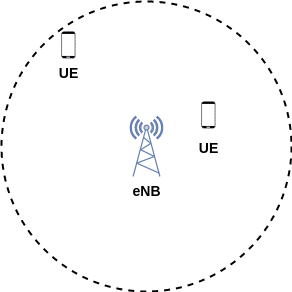 |
<a id='fig4'><p style="text-align: center;"><b>[Figure. 4: LTE RAN topology.](#fig4)</b></a>

<b>Note:</b> Access the React application via: http://vm-public-ip:3000/.

### 2.2 Simulate the designed topology in ns3
The python code in <b>lab2-init.py</b> is provided to convert the design topology in a form acceptable to the SEM and ns3 simulation engines. Moreover, some relevant command line arguments are also passed to the ns3 program implementing the given topology in order to observe the results and status of the simulation. 

<b>Note:</b> The python code will display the saved topologies from the react app and we can choose any one of them to simulate.

In [ ]:
%run -i 'Modules/lab3-init.py'

### 2.3 Processing the simulation data
The python code in <b>lab2-DataPre.py</b> is provided to process and clean the obtained data from ns3 simulations.

<b>Note:</b> Two different levels of logs are collected to exhibit the state machines for UE and eNB as they experience different stages of connection establishment within RAN and with EPC as shown in <a id='fig3'>[Figure. 3](#fig3)</a>.
  

#### 2.3.1 Structure of Simulaiton Logs
The format of the observed logs is important to decode according to the contained information. <a id='fig5'>[Figure. 5](#fig5)</a> provides the description of a single observed log and its fields:

| |
|---|
| 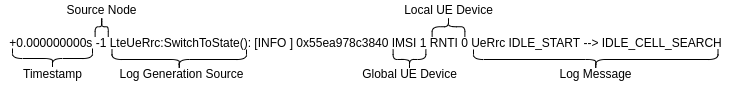 |
<a id='fig5'><p style="text-align: center;"><b>[Figure. 5: Log description](#fig5)</b></a>

In [ ]:
%run -i 'Modules/lab3-dataPre.py'

### <u>Exercises</u>

#### Q1. (a) Verify the designed topology by identifying the number of UEs and eNBs from the observed logs? (b)Identify any logs related to the establishment of LTE bearers as well?

#### Q2. What is a bearer in LTE? What is the difference between a dedicated and default bearer?

#### Q3. Identify the random access procedure logs for one of the UEs from the available logs? All the involved messages must be identified.
(Hint: Preamble detection, random access, random access response are some of the messages)

#### Q4. What are the different functionalities of the MME and SGW in LTE networks?

#### Q5. Describe the difference of the identification of the UE in ns3 and a real world LTE network like Telenor?

## <span style="color:red"> *Task#2: Attachment of UEs with the LTE Network* </span>
In this task, we will observe the connection setup (those implemented in ns3) for the RAN and EPC parts of the network. The process starts with the communication between UEs and eNBs as the cell search begins for attachement of users to eNBs. This is followed up by random access and the associated states of the UEs and eNBs upon reception of various communication messages from within RAN and the EPC. The state machine implementation in ns3 for the eNB and UE RRC layers allows the users in the LTE RAN transition through these states upon occurrence of various events. By observing the sequence of events, we can verify, optimize and potentially troubleshoot issues in the network.

### 3.1 Designing a RAN topology
Kindly utilize the blueprint provided in <a id='fig6'>[Figure. 6](#fig6)</a> to design the topology. Make sure that one UE is inside and one is outside the coverage of the eNB for this task.

| |
|---|
| 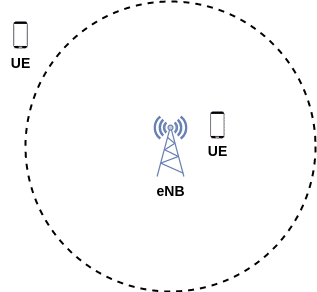 |
<a id='fig6'><p style="text-align: center;"><b>[Figure. 6: LTE RAN topology.](#fig6)</b></a>

<b>Note:</b> Access the React application via: http://vm-public-ip:3000/.

### 3.2 Simulate the designed topology in ns3
The python code in <b>lab2-init.py</b> is provided to convert the design topology in a form acceptable to the SEM and ns3 simulation engines.

<b>Note:</b> The python code will display the saved topologies from the react app and we can choose any one of them to simulate along with a value for eNB tx power = 15.

In [ ]:
%run -i 'Modules/lab3-init.py'

### 3.3 Processing the simulation data
The python code in <b>lab2-dataPre.py</b> is provided to process and clean the obtained data from ns3 simulations.

<b>Note:</b> Two different levels of logs are collected to exhibit the state machines for UE and eNB as they experience different stages of connection establishment within RAN and with EPC as shown in <a id='fig3'>[Figure. 3](#fig3)</a>.
  

#### 3.3.1 Structure of Simulaiton Logs
The format of the observed logs is important to decode according to the contained information. <a id='fig5'>[Figure. 5](#fig5)</a> provides the description of a single observed log and its fields:

In [ ]:
%run -i 'Modules/lab3-dataPre.py'

### <u>Exercises</u>

#### Q1. Identify the states of each UE until it is connected with the eNB (the completion of Attachment process). Enlist relevant logs from the simulation logs where necessary.

#### Q2. Is there a problem with any of the UEs in the designed topology? Consult the state diagram in <a id='fig3'>[Figure. 3](#fig3)</a> and simulation logs to identify the problem. What can be done to resolve this problem?

[Hint: Analyze the logs to identify the state of each UE. This will help in identifying any problematic logs and the issue itself.] 

#### Q3. How is radio link failure issue detected and resolved in LTE? Identify the relevant logs from simulation?

#### Q4. What is NAS and UserContext in LTE?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Task#3: Boundary Conditions in Cellular Networks
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
In this task, students will simulate a cellular topology in order to find the cell boundary. The coordinates of the UE and eNB can be used to find the approximate coverage distance. This can be achieved by having a single UE and altering its location while keeping the **eNB txpower** parameter fixed. The boundary would be approximately beyond the point where UE is unable to communicate with the eNB.

**Note:** Use the topology blueprint for designing a react topology as shown below in <a id='fig7'>[Figure. 7](#fig7)</a>.

| |
|---|
| 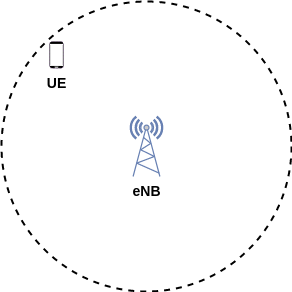 |
<a id='fig7'><p style="text-align: center;"><b>[Figure. 7: LTE RAN topology](#fig7)</b></a>   


Add additional cells as required in the jupyter notebook and submit those additional cells as well during evaluation.

In [ ]:
%run -i 'Modules/lab3-init.py'

In [ ]:
%run -i 'Modules/lab3-dataPre.py'

### <u>Exercises</u>

#### Q1. What is the boundary of the cell for the following values of eNB txpower? If the mentioned condition for finding the boundary fails, specify for which value it happens?
- 15dBm
- 20dBm
- 30dBm

#### Q2. Why are there different values for txpower for eNBs and UEs in the LTE standard?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------